In [3]:
from scattnlay import scattnlay, fieldnlay
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
help(scattnlay)

Help on function scattnlay in module scattnlay.main:

scattnlay(x, m, theta=array([], dtype=float64), nmax=-1, pl=-1, mp=False)
    scattnlay(x, m[, theta, nmax, pl, mp])
    
    Calculate the actual scattering parameters and amplitudes.
    
        x: Size parameters (1D or 2D ndarray)
        m: Relative refractive indices (1D or 2D ndarray)
        theta: Scattering angles where the scattering amplitudes will be
               calculated (optional, 1D ndarray)
        nmax: Maximum number of multipolar expansion terms to be used for the
              calculations. Only use it if you know what you are doing.
        pl: Index of PEC layer. If there is none just send -1.
        mp: Use multiple (True) or double (False) precision.
    
    Returns: (terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2)
    with
        terms: Number of multipolar expansion terms used for the calculations
        Qext: Efficiency factor for extinction
        Qsca: Efficiency factor for scattering
  

In [5]:
# wrap scattnlay and integrate

def x_size_param(d, wavelength):
    return d*np.pi/wavelength

def droplet_scatteirng_amplitudes(x, theta): # water
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return S1, S2

def droplet_scatteirng_effciency(x, theta): # water
    m = np.array([1.33 + 0.0j], dtype = np.complex128)
    terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2 = scattnlay(x, m, theta)
    return Qsca

def phase_function(S1, S2): # unpolarised light
    return 0.5*(abs(S1)**2+abs(S2)**2)

def solid_angle_normalisation(y, theta): # integrate y over polar and azimuthal angles
    N = np.trapz(y*np.sin(theta), theta)*2*np.pi
    return y/N

def relative_irradiances(x, theta): # arbitraty units
    S1, S2 = droplet_scatteirng_amplitudes(x, theta)
    return phase_function(S1, S2)


def solid_angle_scattered_irradiance(x, theta, theta1, theta2): # integrate irradiances over solid angle from theta1 to theta2
    rel_irr = relative_irradiances(x, theta) # get irradiances
    (ind1, theta1) = min(enumerate(theta), key=lambda x: abs(theta1 - x[1])) # find closest matching polar angle range
    (ind2, theta2) = min(enumerate(theta), key=lambda x: abs(theta2 - x[1]))
    irr_range = rel_irr[ind1:ind2+1] # integrate over range
    theta_range = theta[ind1:ind2+1]
    return np.trapz(irr_range*np.sin(theta_range), theta_range )*2*np.pi 

In [4]:
# generate array of size parameters
min_um, max_um, step = 1, 50, 0.1 
wavelength = 632.8e-9 # FSSP

droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))

In [5]:
# generate polar angle array (phase function resolution)
deg_step = 0.5
theta = np.arange(0, np.pi, np.radians(deg_step))

# Validation

validation 1 – scattnlay reporduces BH plot for x = 3

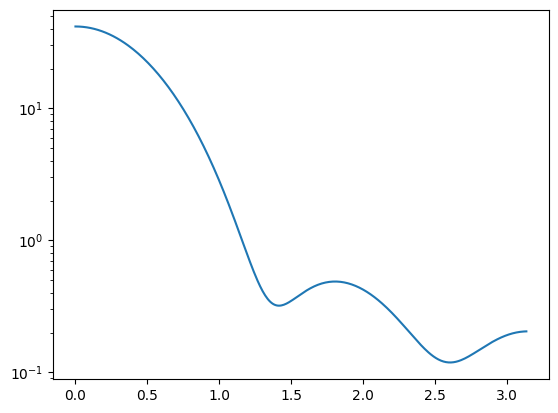

In [6]:
irr = relative_irradiances(np.array([3]), theta)
plt.yscale("log")
plt.plot(theta, irr)

validation 2 – scattnlay reproduces extinction paradox over size parameter range

In [7]:
scat_eff_iter = map(lambda x: droplet_scatteirng_effciency(x, theta), droplet_x)
scat_eff = list(scat_eff_iter)

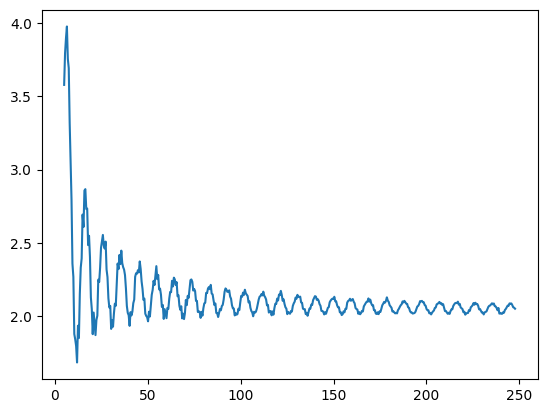

In [8]:
plt.plot(droplet_x,scat_eff)

validation 3 – model reproduces reponse curve for FSSP

In [9]:
theta1_deg, theta2_deg  = 4.6, 12.8 # FSSP
wavelength = 632.8e-9 # FSSP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

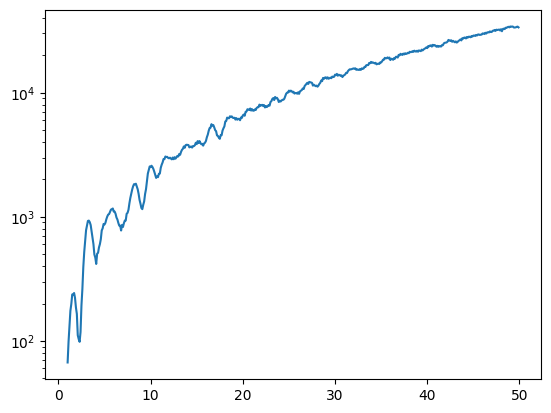

In [10]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

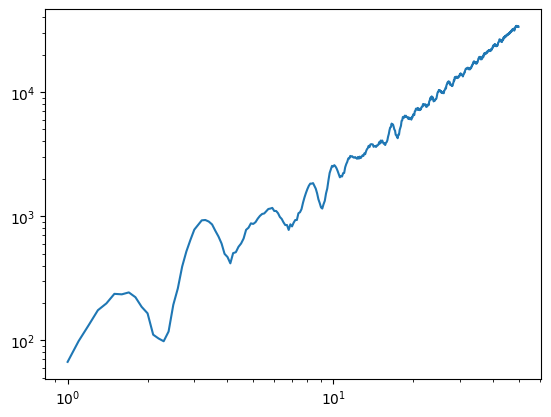

In [11]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

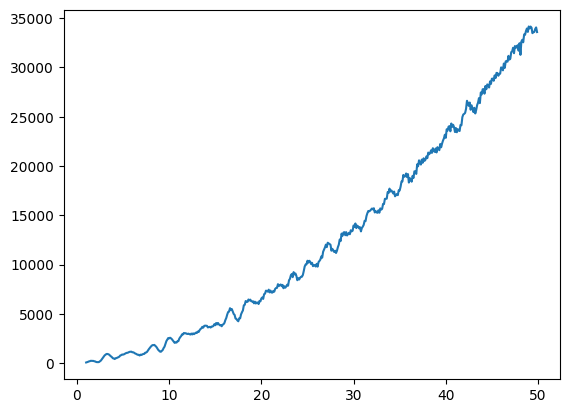

In [12]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

# BCP response curve

In [13]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

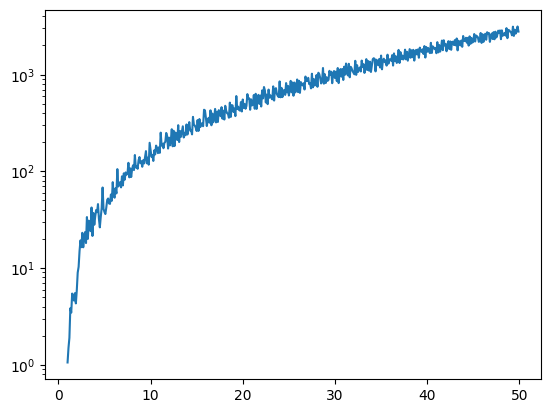

In [14]:
plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

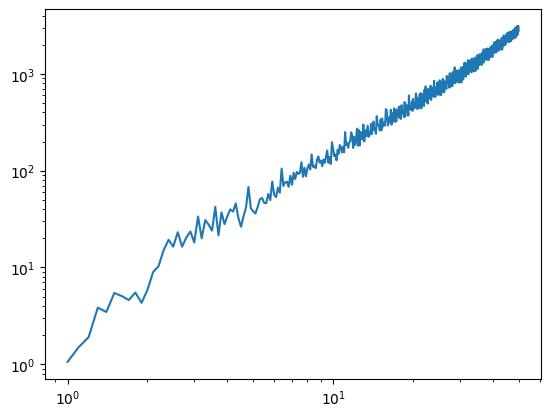

In [15]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

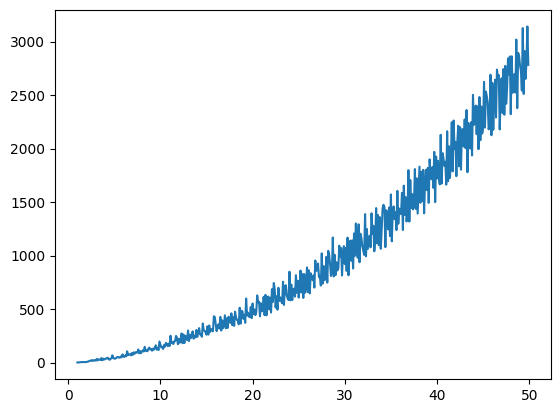

In [16]:
# plt.yscale("log")
# plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr)

In [25]:
theta1_deg, theta2_deg  = 144, 156 # BCP
wavelength = 658e-9 # BCP
min_um, max_um, step = 5, 20, 0.2
deg_step = 0.5

theta = np.arange(0, np.pi, np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x)
scat_irr = list(scat_irr_iter)

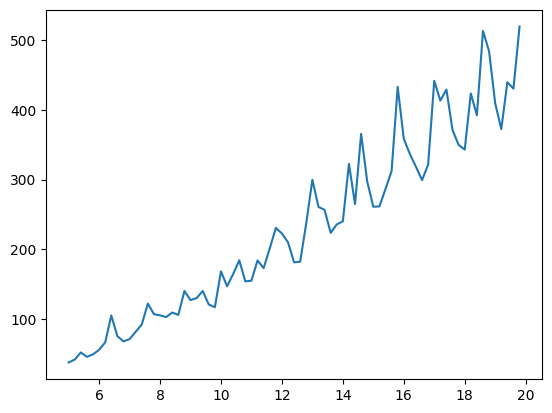

In [26]:
plt.plot(droplet_sizes*10**6,scat_irr)

# multiple wavelength

In [182]:
theta1_deg, theta2_deg  = 144, 156 # BCP
# theta1_deg, theta2_deg  = 4.6, 12.8 # FSSP
min_um, max_um, step = 1, 50, 0.1
deg_step = 0.1

theta = np.arange(np.radians(theta1_deg), np.radians(theta2_deg), np.radians(deg_step))
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 

# red
wavelength = 635e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_red = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_red)
scat_irr_red = list(scat_irr_iter)

# green
wavelength = 520e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_green = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_green)
scat_irr_green = list(scat_irr_iter)

# blue
wavelength = 405e-9 
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x_blue = list(deepcopy(droplet_x_iter))
scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, np.radians(theta1_deg), np.radians(theta2_deg)), droplet_x_blue)
scat_irr_blue = list(scat_irr_iter)

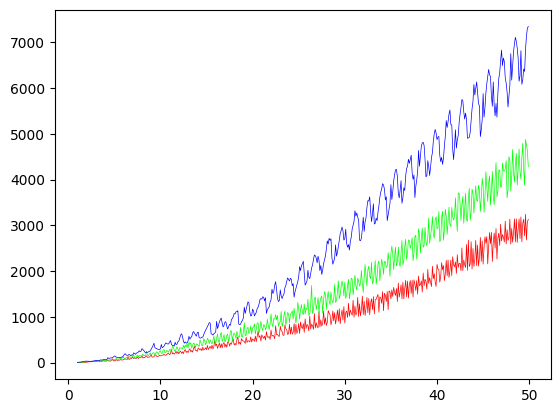

In [183]:
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_green, color='lime', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_blue, color='blue', linewidth=0.5)

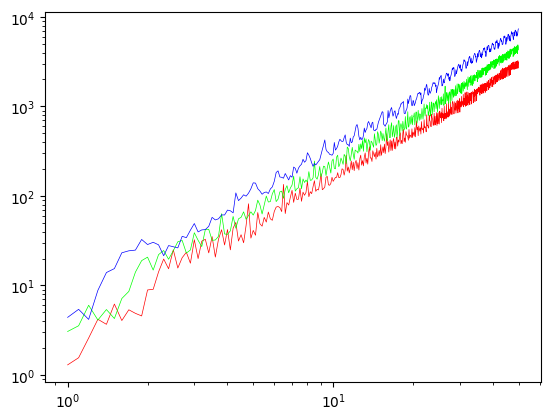

In [184]:
plt.yscale("log")
plt.xscale("log")
plt.plot(droplet_sizes*10**6,scat_irr_red, color='red', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_green, color='lime', linewidth=0.5)
plt.plot(droplet_sizes*10**6,scat_irr_blue, color='blue', linewidth=0.5)

# Backscatter angle search

In [185]:
# create a sliding window range of angles
window_size_deg = 8 
window_step_deg = 1
theta1s = np.arange(np.radians(135), np.radians(180-window_size_deg), np.radians(window_step_deg))
theta2s = theta1s+np.radians(window_size_deg)

# calculate the backscatter curve for each window
min_um, max_um, step_um = 1, 50, 0.1
droplet_sizes = np.arange(min_um*10**-6, max_um*10**-6, step*10**-6) 
irr_step_deg = 0.1
wavelength = 635e-9
droplet_x_iter = map(lambda d: np.array([x_size_param(d, wavelength)]), droplet_sizes)
droplet_x = list(droplet_x_iter)

scat_irrs = []
for theta1, theta2 in zip(theta1s, theta2s):
    theta = np.arange(theta1, theta2, np.radians(irr_step_deg))
    scat_irr_iter = map(lambda x: solid_angle_scattered_irradiance(x, theta, theta1, theta2), droplet_x)
    scat_irr = list(scat_irr_iter)
    scat_irrs.append(scat_irr)

In [186]:
# calculate the correlation coefficient for each backscatter curve
corr_coefs_log = list(map(lambda scat_irr: np.corrcoef(np.log(droplet_sizes),np.log(scat_irr))[0,1], scat_irrs))
corr_coefs = list(map(lambda scat_irr: np.corrcoef(droplet_sizes,scat_irr)[0,1], scat_irrs))

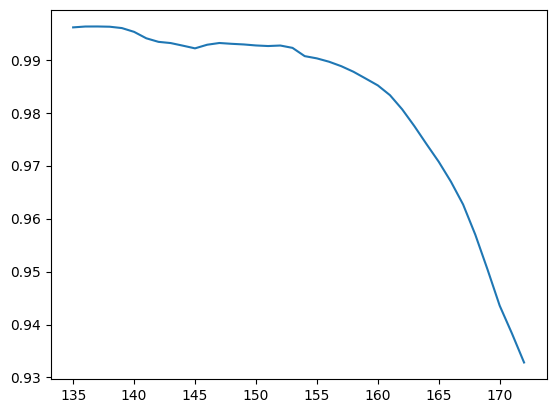

In [187]:
coefs = corr_coefs_log
plt.plot(np.degrees(theta1s),coefs)

In [188]:
ind = coefs.index(max(coefs))
ind

2

In [189]:
round(np.degrees(theta1s[ind]))

137

In [190]:
np.degrees(theta2s[ind])

145.0

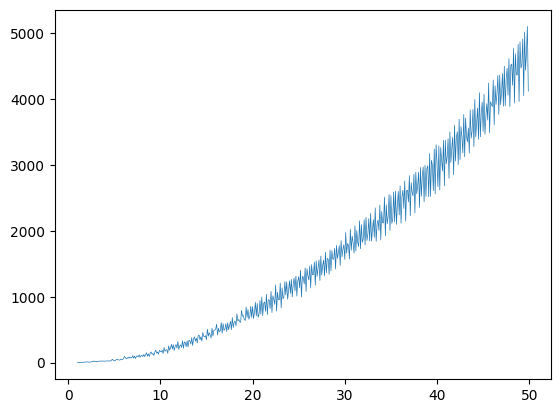

In [191]:
plt.plot(droplet_sizes*10**6,scat_irrs[ind], linewidth=0.5)

In [192]:
len(scat_irrs)

38

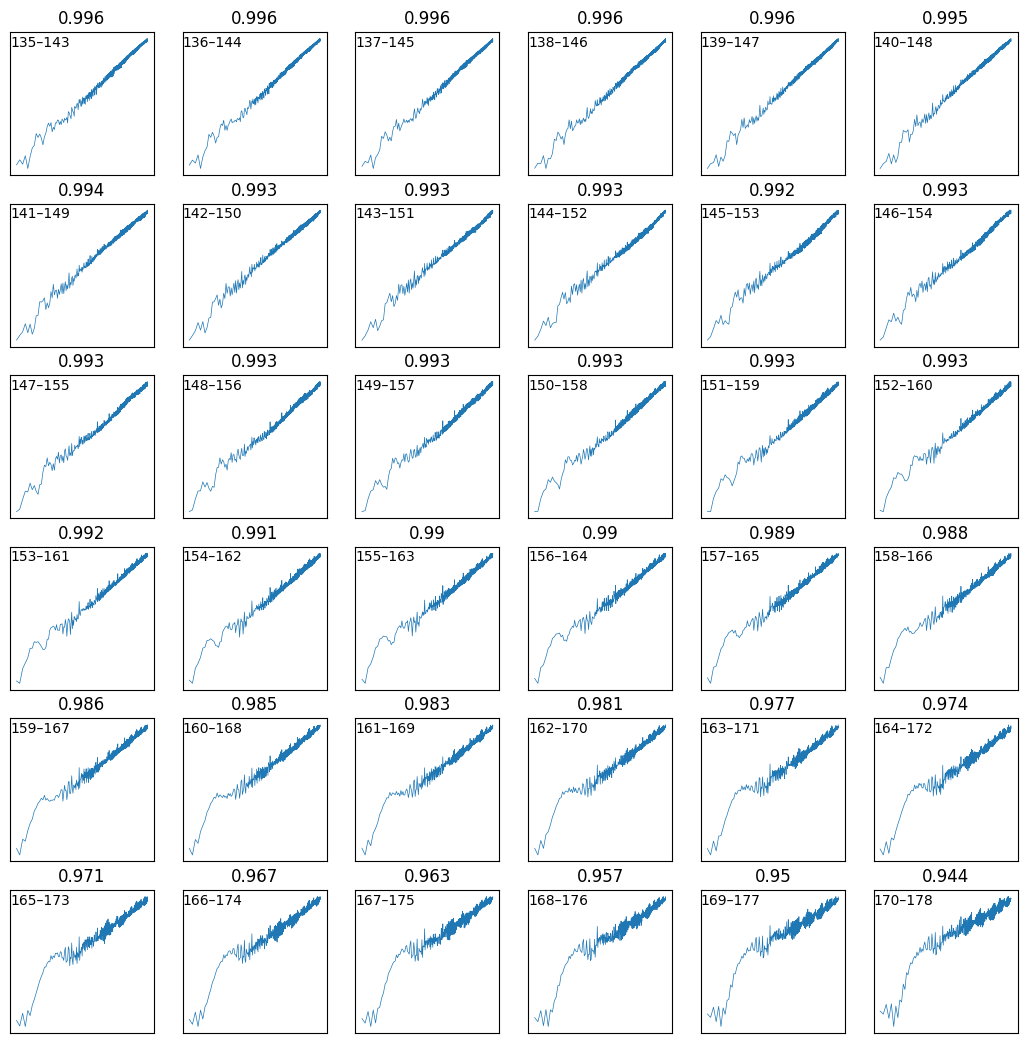

In [193]:
fig, axes = plt.subplots(6,6)
for i, ax in enumerate(np.ndarray.flatten(axes)):
    ax.plot(np.log(droplet_sizes*10**6),np.log(scat_irrs[i]), linewidth=0.5)
    ax.title.set_text(str(round(coefs[i],3)))
    ax.text(0,0.9,str(round(np.degrees(theta1s[i])))+"–"+str(round(np.degrees(theta2s[i]))),transform=ax.transAxes)
    ax.set_xticks([])
    ax.set_yticks([])
fig.set_size_inches(13,13)